In [1]:
pip install numpy pandas scikit-learn  matplotlib

# REGRESIÓN LINEAL 
- Estudiante: Pablo Andrés Suarez Rocha
- Grupo: 35

In [4]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Cargamos el dataset y realizamos exploración de datos.

In [9]:
#Cargamos el documento csv
info = pd.read_csv('C:/Users/ANDRES_S/Desktop/Andrés/Octavo semestre UNAD/ANALISIS  DE DATOS/Tarea 3/CARS.csv')

# Ver las primeras filas del dataset
info.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [11]:
info.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
# Convertir los datos en un DataFrame
df = pd.DataFrame(info)

## Definimos las variables con las que vamos a trabajar y creamos el modelo de regresión lineal.

In [16]:
# Variables independientes (year y km_driven) y dependiente (selling_price)

X = df[['year', 'km_driven']]
y = df['selling_price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()
# Ajustar el modelo a los datos
modelo.fit(X, y)
# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes (year y km_driven)

# Mostrar los coeficientes

print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (year, β1): {beta_1}")
print(f"Coeficiente (km_driven, β2): {beta_2}")

Intercepto (β0): -111227352.76280843
Coeficiente (year, β1): 55511.65102899528
Coeficiente (km_driven, β2): -0.2795856895779668


In [18]:
# Visualización de la regresión (manteniendo constante el número de habitaciones)
km_driven = 60000  # Fijar el número de habitaciones en 2 para el gráfico
year_range = np.linspace(df['year'].min(), df['year'].max(), 2016)

# Predecir manteniendo las habitaciones constantes
predicciones_fijas = modelo.predict(np.column_stack((year_range, np.full_like(year_range, km_driven))))

C:\Users\ANDRES_S\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Realizamos gráficas.

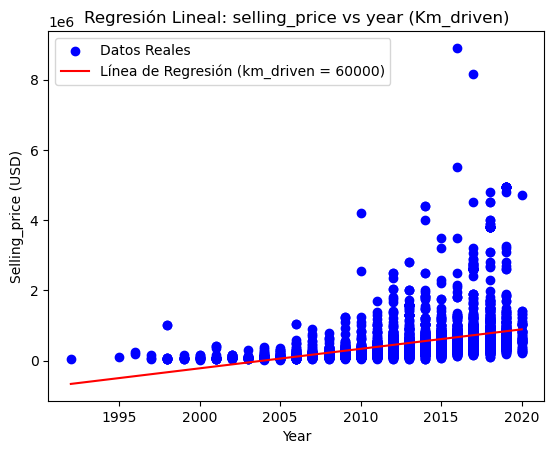

In [26]:
# Graficar los datos reales y la línea de regresión
plt.scatter(df['year'], y, color='blue', label='Datos Reales')
plt.plot(year_range, predicciones_fijas, color='red', label=f'Línea de Regresión (km_driven = {km_driven})')
plt.title('Regresión Lineal: selling_price vs year (Km_driven)')
plt.xlabel('Year')
plt.ylabel('Selling_price (USD)')
plt.legend()
plt.show()

## Realizamos predicciones para probar el modelo

In [28]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[2010, 80000], [2018, 120000]])  # Nuevos valores (year, kilometraje)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Año: {nuevo_X[i][0]} , Kilometraje: {nuevo_X[i][1]}  KM): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Año: 2010 , Kilometraje: 80000  KM): 328698.95 USD
Predicción 2 para (Año: 2018 , Kilometraje: 120000  KM): 761608.73 USD


C:\Users\ANDRES_S\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos (suponiendo que tienes el dataset con 30 ejemplos de tamaño)
# Por ejemplo, los datos se pueden construir como arrays o un DataFrame

X = df[['year', 'km_driven']]
y = df['selling_price']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.17174975569610318
Error Absoluto Medio (MAE): 268969.20372486714


## Conclusiones
- El valor del coeficiente de determinación es de 0.17 o sea del 17% por lo que el modelo para determinar el precio del automovil siguiendo las variables de Kilometraje y Año del modelo no es confiable.
- Tiene un error absoluto medio de 268969 (USD), lo que no da confiabilidad a la hora de medir el valor de venta de un automovil.
## Sugerencias
- Probar utilizando nuevas variables con las que se pueda trabajar.
- Realizar una limpieza de datos más  grande para tratar de hallar un mejor porcentaje en el coeficiente de determinación.
- Agregar otros atributos al dataset para un mejor análisis.